In [ ]:
from tensorflow.keras.layers import Input , BatchNormalization , ReLU , Conv2D , Dense , MaxPool2D , AvgPool2D , GlobalAvgPool2D , Concatenate
import tensorflow as tf 
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

In [ ]:
def bat_relu_conv(x , filters , kernel_size) : 
  x = BatchNormalization()(x)
  x = ReLU()(x)
  x = Conv2D(filters=filters , kernel_size=kernel_size , padding="same")(x)
  return x

In [ ]:
def Dense_block(tensor , k , reps):
  for _ in range(reps):
    x = bat_relu_conv(tensor , filters=4*k , kernel_size=1)
    x = bat_relu_conv(x , filters=k , kernel_size=3)
    tensor = Concatenate()([tensor , x])
  return tensor

In [ ]:
def transition_layer(x , theta=0.5):
  #  (0 < theta <= 1) if a dense block contains M feature-maps ,
  #  we let the following transition layer generate (thete of M) output feature-maps
  f = int(tf.keras.backend.int_shape(x)[-1] * theta) 
  x = bat_relu_conv(x , filters=f , kernel_size=1)
  x = AvgPool2D(2 , strides=2 , padding="same")(x)
  return x 

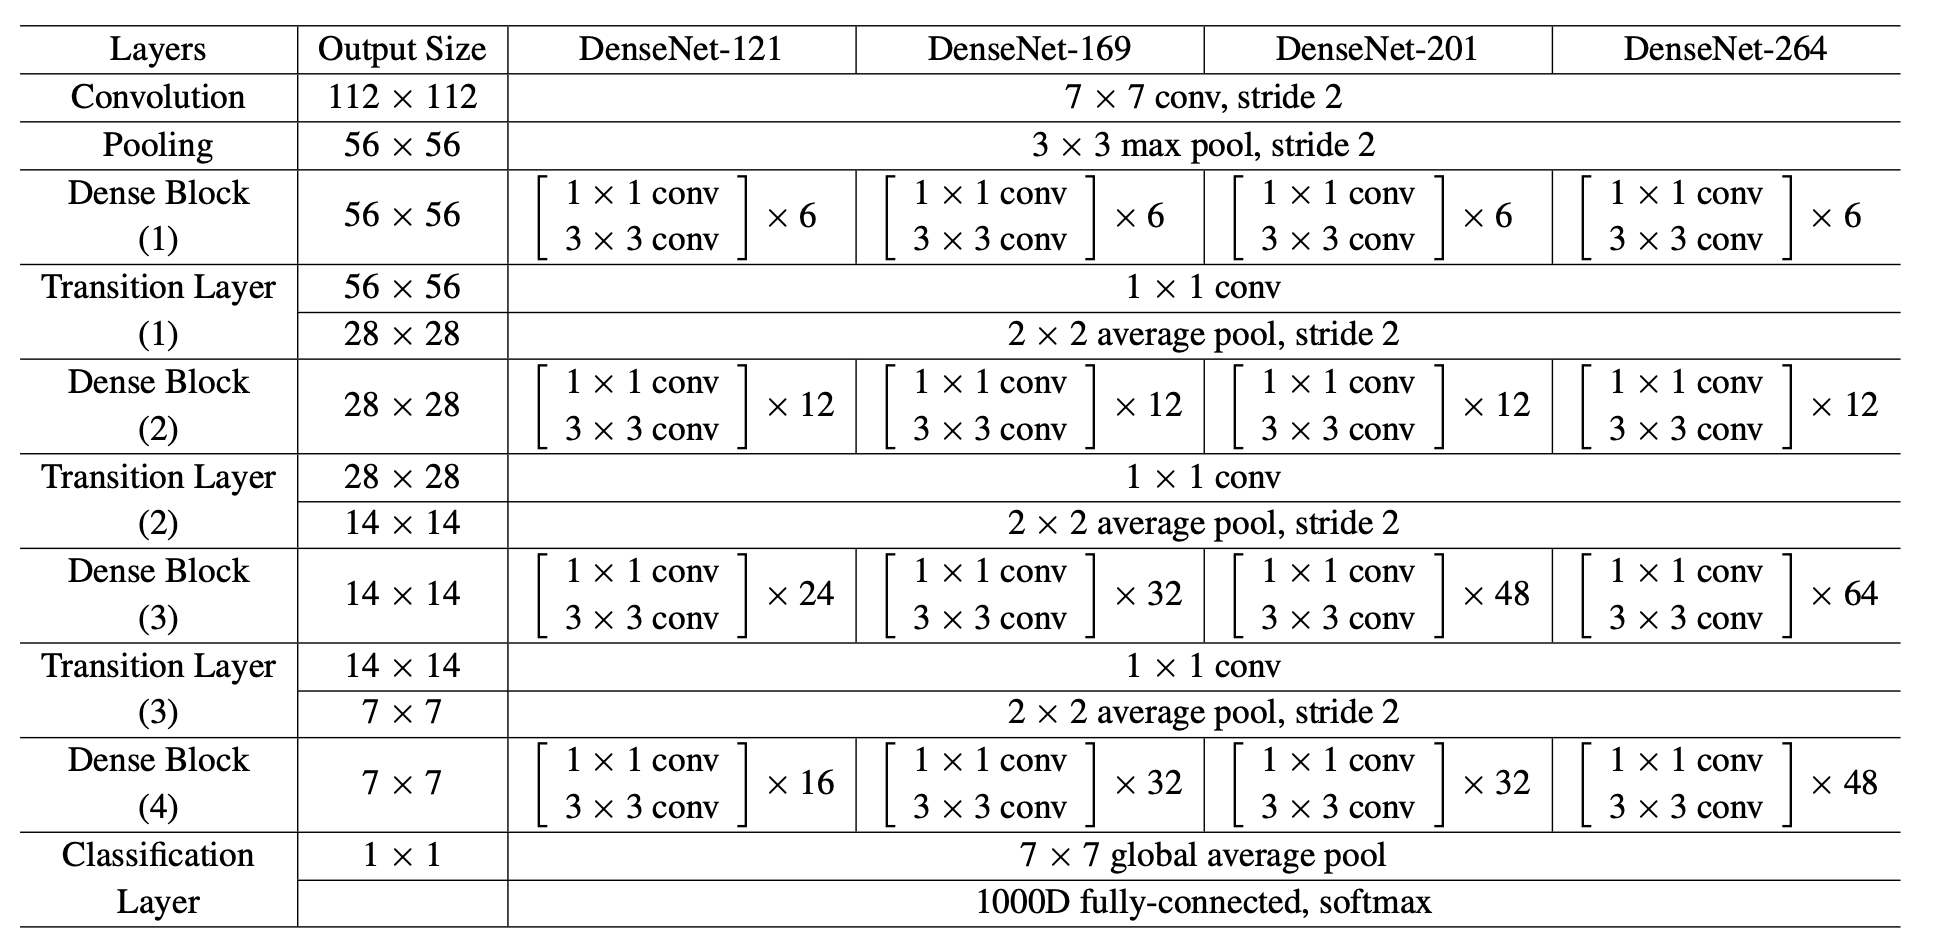

In [ ]:
k = 32 
REPETATIONS = 6,12,24,16
INPUT_SHAPE = (224,224,3)
input = Input(shape=INPUT_SHAPE)
# the top of our model 
x = Conv2D(filters=2*k , kernel_size=7 , strides=2 , padding="same")(input)
x = MaxPool2D(pool_size=3 , strides=2 , padding="same")(x)
# the main model 

for reps in REPETATIONS:
  d = Dense_block(x ,k=k,  reps=reps) 
  x = transition_layer(d , theta=0.5)

# the tail model 
x = GlobalAvgPool2D()(d) # apply the GlobalAvgPool2D to the output of the dense layer
output = Dense(1000 , activation="softmax")(x)

model = Model(input , output)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_250 (Conv2D)            (None, 112, 112, 64  9472        ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 56, 56, 64)  0           ['conv2d_250[0][0]']             
 )                                                                                          

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.700524 to fit



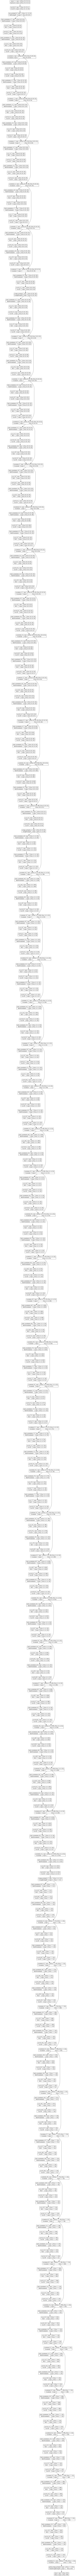

In [ ]:
plot_model(model , show_shapes=True)